<a href="https://colab.research.google.com/github/AKBER-HUSSAIN/ML_Lab_Practice/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES DATASET**

In [55]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/Copy of house_price_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [67]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [58]:
print("Shape:", df.shape)
print("Types:", df.dtypes)

Shape: (1460, 81)
Types: Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


**CONSTANT FEATURES**

In [69]:
numeric_df = df.select_dtypes(include=np.number)
constant_features = [feature for feature in numeric_df.columns if df[feature].std()==0]
print("number of Constant Features : ",len(constant_features))

number of Constant Features :  0


**Quasi Constant Features**

In [71]:
quasi_constant_features = []
for feature in df.columns:
    predominant = (df[feature].value_counts() / len(df)).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)

print(f"Number of Quasi Constant Features: {len(quasi_constant_features)}")
print(quasi_constant_features)

Number of Quasi Constant Features: 1
['Utilities']


**Duplicated Features**

In [72]:
duplicated_features = []

for i in range(len(df.columns)):
    col_1 = df.columns[i]
    for col_2 in df.columns[i + 1:]:
        if df[col_1].equals(df[col_2]):
            duplicated_features.append(col_2)
print(f"Number of duplicated features: {len(duplicated_features)}")
print("Duplicate features : ",duplicated_features)

Number of duplicated features: 0
Duplicate features :  []


<Axes: >

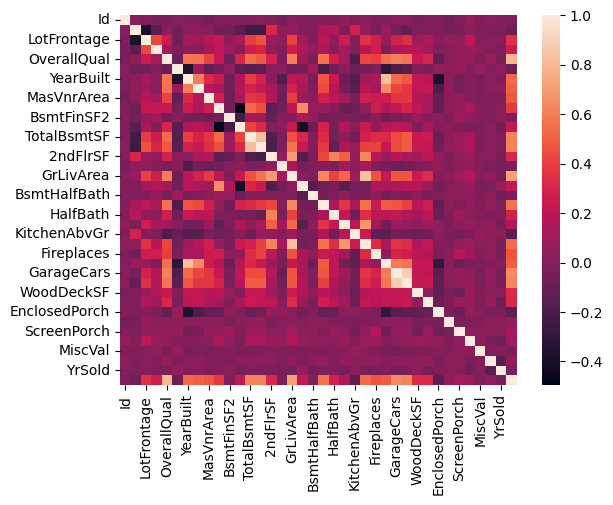

In [73]:
import seaborn as sns
corrmat = numeric_df.corr()
sns.heatmap(corrmat)

In [74]:
group_feature_ls = []
correlation_group = []

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(numeric_df, 0.85)
correlated_features = set(corr_features)
print(correlated_features, "\ncorrelated_features:", len(correlated_features))

{'GarageArea'} 
correlated_features: 1



 Highly Correlated Features (> 0.9): []


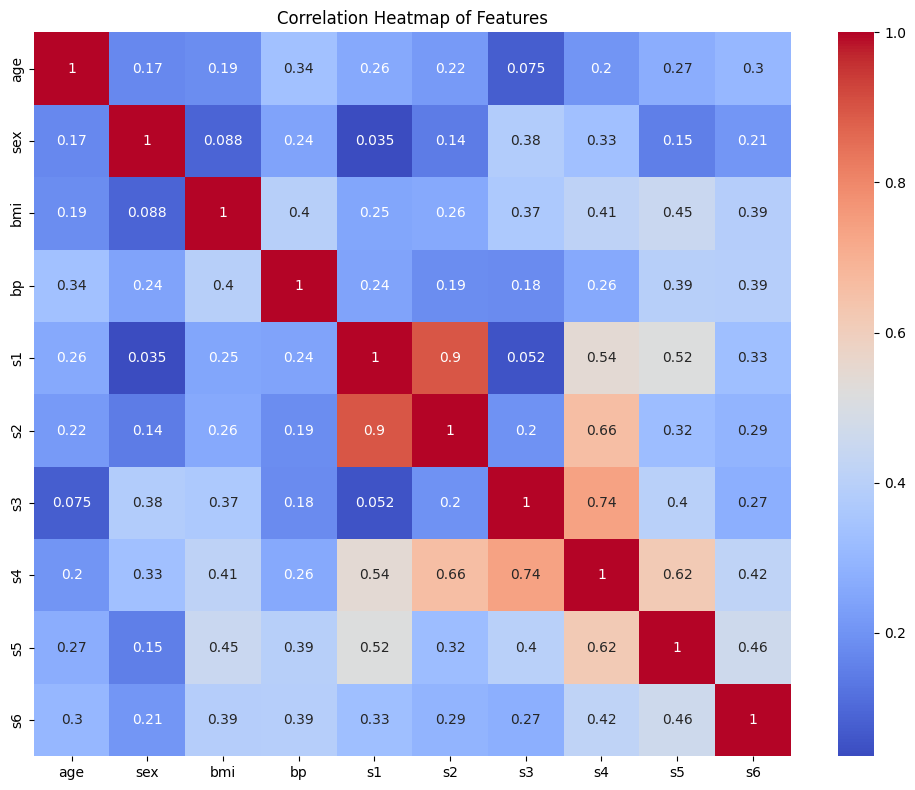

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


corr_matrix = X.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = [col for col in upper.columns if any(upper[col] > 0.9)]

print(f"\n Highly Correlated Features (> 0.9): {high_corr_features}")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

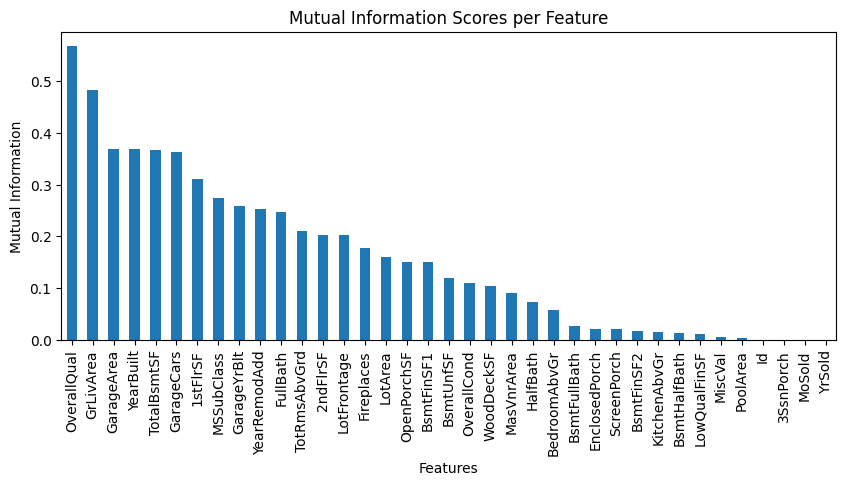

Top 20 features based on Mutual Information:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'OpenPorchSF'],
      dtype='object')


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.model_selection import train_test_split

y = df['SalePrice']
x = df.select_dtypes(include=np.number)
x = x.fillna(0)
x = x.drop(columns='SalePrice')

mi = mutual_info_regression(x, y)
mi_series = pd.Series(mi, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 4))
mi_series.plot.bar()
plt.title("Mutual Information Scores per Feature")
plt.ylabel("Mutual Information")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_regression, k=20)
selector.fit(x, y)

top_mi_features = x.columns[selector.get_support()]
print("Top 20 features based on Mutual Information:\n", top_mi_features)

In [85]:
#Chi 2 Method
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2

#loading the titanic dataset
df=pd.read_csv('/Titanic-Dataset.csv')
important_feature=[]

#dividing train data into x_train and y_train
X_train = df.drop(['Survived','Name','Cabin','Ticket'], axis=1)
Y_train=df['Survived']

#encode the non-numeric features into numeric values
X_train['Sex']=np.where(X_train.Sex=='male',0,1)
ordinal_label = {k:i for i,k in enumerate(X_train['Embarked'].unique(),0)}
X_train['Embarked']=X_train['Embarked'].map(ordinal_label)

#calculating f_score
f_score,p_value=chi2(X_train.fillna(0),Y_train)
p_value=p_value.round(2)
chi2_df=pd.DataFrame({'Features':X_train.columns,"F Score":f_score,"P Value":p_value}).sort_values(by='F Score',ascending=False)
print(chi2_df)
important_features=chi2_df[chi2_df['P Value']<0.05]['Features'].tolist()
print(important_features)

      Features      F Score  P Value
6         Fare  4518.319091     0.00
2          Sex   170.348127     0.00
1       Pclass    30.873699     0.00
7     Embarked    14.124257     0.00
5        Parch    10.097499     0.00
0  PassengerId     3.312934     0.07
4        SibSp     2.581865     0.11
3          Age     1.286098     0.26
['Fare', 'Sex', 'Pclass', 'Embarked', 'Parch']


In [86]:
#ANOVA Method for Classification
import pandas as pd
from sklearn.feature_selection import f_classif
#load data
df=pd.read_csv('/Titanic-Dataset.csv')
important_feature=[]

#dividing train data into x_train and y_train
X_train = df.drop(['Survived', 'Name','Cabin','Ticket'], axis=1)
Y_train=df['Survived']

#encode the non-numeric features into numeric values
X_train['Sex']=np.where(X_train.Sex=='male',0,1)
ordinal_label = {k:i for i,k in enumerate(X_train['Embarked'].unique(),0)}
X_train['Embarked']=X_train['Embarked'].map(ordinal_label)

#calculating f_score and p score
f_score,p_value=f_classif(X_train.fillna(0),Y_train)
p_value=p_value.round(2)
Anova_df=pd.DataFrame({'Features':X_train.columns,"F Score":f_score,"P Value":p_value}).sort_values(by='F Score',ascending=False)
print(Anova_df)
important_features=Anova_df[Anova_df['P Value']<0.05]['Features'].tolist()
print(important_features)

      Features     F Score  P Value
2          Sex  372.405724     0.00
1       Pclass  115.031272     0.00
6         Fare   63.030764     0.00
7     Embarked   12.558867     0.00
5        Parch    5.963464     0.01
4        SibSp    1.110572     0.29
3          Age    0.098757     0.75
0  PassengerId    0.022285     0.88
['Sex', 'Pclass', 'Fare', 'Embarked', 'Parch']


In [88]:
#Anova for Regression
import pandas as pd
from sklearn.feature_selection import f_regression
#load data
df=pd.read_csv('/content/drive/MyDrive/dataset/Copy of house_price_train.csv')
important_feature=[]

#dividing train data into x_train and y_train
X_train = df[df.select_dtypes(include=['number']).columns].drop(['SalePrice'], axis=1)
Y_train=df['SalePrice']

#calculating f_score and p score
f_score,p_value=f_regression(X_train.fillna(0),Y_train)
p_value=p_value.round(2)
Anova_df=pd.DataFrame({'Features':X_train.columns,"F Score":f_score,"P Value":p_value}).sort_values(by='F Score',ascending=False)
print(Anova_df)
important_features=Anova_df[Anova_df['P Value']<0.05]['Features'].tolist()
print(important_features)

         Features      F Score  P Value
4     OverallQual  2436.770591     0.00
16      GrLivArea  1470.585010     0.00
26     GarageCars  1013.705666     0.00
27     GarageArea   926.951287     0.00
12    TotalBsmtSF   880.341282     0.00
13       1stFlrSF   845.524488     0.00
19       FullBath   668.430296     0.00
23   TotRmsAbvGrd   580.762801     0.00
6       YearBuilt   548.665821     0.00
7    YearRemodAdd   504.714855     0.00
8      MasVnrArea   419.328468     0.00
24     Fireplaces   406.503866     0.00
9      BsmtFinSF1   255.923517     0.00
28     WoodDeckSF   171.494673     0.00
14       2ndFlrSF   165.561151     0.00
29    OpenPorchSF   161.577391     0.00
20       HalfBath   128.018964     0.00
3         LotArea   109.090355     0.00
25    GarageYrBlt   106.902249     0.00
17   BsmtFullBath    79.300912     0.00
11      BsmtUnfSF    70.303948     0.00
2     LotFrontage    67.012397     0.00
21   BedroomAbvGr    42.456412     0.00
22   KitchenAbvGr    27.437234     0.00


In [89]:
#AUC-ROC using Classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

df=pd.read_csv('/Titanic-Dataset.csv')
target='Survived'
x=df[df.select_dtypes(include=['number']).columns].drop(columns=[target])
y=df[target]

feature_auc={}

for feature in x.columns:
    X_feature=x[[feature]]
    X_train,X_test,Y_train,Y_test = train_test_split(X_feature.fillna(0),y,test_size=0.3,random_state=42)

    model=LogisticRegression(max_iter=1000)
    model.fit(X_train,Y_train)

    Y_prob=model.predict_proba(X_test)[:,1]
    #calculate auc-roc score
    auc=roc_auc_score(Y_test,Y_prob)
    feature_auc[feature]=auc

feature_auc_df=pd.DataFrame({'Feature': list(feature_auc.keys()),'AUC Score':list(feature_auc.values())}).sort_values(by='AUC Score', ascending=False)
print(feature_auc_df)

       Feature  AUC Score
5         Fare   0.743215
1       Pclass   0.707293
4        Parch   0.557956
2          Age   0.494836
0  PassengerId   0.478969
3        SibSp   0.429592


In [90]:
#AUC-ROC using Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
df=pd.read_csv('/content/drive/MyDrive/dataset/Copy of house_price_train.csv')
target='SalePrice'
x=df[df.select_dtypes(include=['number']).columns].drop(columns=[target])
y=df[target]
#converting Continuos target into categorical
y=(y > np.median(y)).astype(int)

feature_auc={}

for feature in x.columns:
    X_feature=x[[feature]]
    X_train,X_test,Y_train,Y_test = train_test_split(X_feature.fillna(0),y,test_size=0.3,random_state=42)

    model=LinearRegression()
    model.fit(X_train,Y_train)

    Y_pred=model.predict(X_test)
    #calculate auc-roc score
    auc=roc_auc_score(Y_test,Y_pred)
    feature_auc[feature]=auc

feature_auc_df=pd.DataFrame({'Feature': list(feature_auc.keys()),'AUC Score':list(feature_auc.values())}).sort_values(by='AUC Score', ascending=False)
print(feature_auc_df)

          Feature  AUC Score
4     OverallQual   0.911808
6       YearBuilt   0.890275
16      GrLivArea   0.875840
25    GarageYrBlt   0.873673
19       FullBath   0.850811
27     GarageArea   0.837056
26     GarageCars   0.835853
7    YearRemodAdd   0.805705
12    TotalBsmtSF   0.773705
23   TotRmsAbvGrd   0.762828
29    OpenPorchSF   0.761059
13       1stFlrSF   0.760525
24     Fireplaces   0.731686
3         LotArea   0.689312
8      MasVnrArea   0.678342
20       HalfBath   0.666000
14       2ndFlrSF   0.655135
9      BsmtFinSF1   0.640385
28     WoodDeckSF   0.639255
5     OverallCond   0.607265
17   BsmtFullBath   0.601131
21   BedroomAbvGr   0.596954
2     LotFrontage   0.581053
11      BsmtUnfSF   0.578562
30  EnclosedPorch   0.563509
35         MoSold   0.547828
22   KitchenAbvGr   0.529226
36         YrSold   0.526568
10     BsmtFinSF2   0.524003
15   LowQualFinSF   0.510416
32    ScreenPorch   0.509432
31      3SsnPorch   0.507861
33       PoolArea   0.504878
18   BsmtHalfB